In [1]:
include("../EuclidElements.jl");

# Book 1

## Proposition 4

Euclid just did a beautiful proof of equivalent triangles.

### I.4 Base case

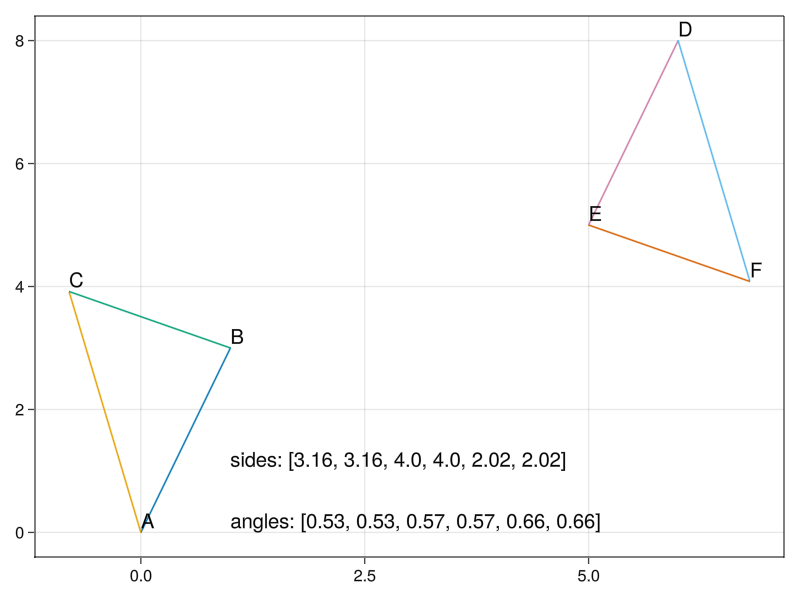

In [2]:
#Define the lengths of 2 sides and the shared angle of a triangle
d_1 = 3
d_2 = 4
θ = π/6

function get_third(A::Point2, B::Point2)
    v = B-A
    u = [cos(θ) -sin(θ); sin(θ) cos(θ)]*v/norm(v)
    C = A + (u*d_2)
end
# Construct triangle ABC starting at 0,0, with B at 1,3 and C where it needs to be from there
A = Point2f(0,0)
B = A + [1, d_1]
C = get_third(A,B)

# Construct triangle DEF starting at 6,8, with E at 6,12 and F where it needs to be from there
D = Point2f(6,8)
E = D - [1, d_1]
F = get_third(D,E)

#setup the chart space...
f = Figure()
Axis(f[1,1])

#Draw the actual stuff
lines!([A,B])
lines!([A,C])
lines!([B,C])

lines!([D,E])
lines!([D,F])
lines!([E,F])

#Now draw the point labels
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(D, text="D")
Epoint = text!(E, text="E")
Fpoint = text!(F, text="F")

# Draw some info that proves what Euclid was talking about
text!(Point2f(1,1), text="sides: "*string(
    round.(
        [distance(A,B), distance(D,E), distance(A,C), distance(D,F), distance(C,B), distance(F,E)], digits=2)))
text!(Point2f(1,0), text="angles: "*string(
    round.(
        [asin(distance(C,B)/distance(A,C)), asin(distance(E,F)/distance(D,F)),
         atan(distance(B,C)/distance(A,B)), atan(distance(E,F)/distance(E,D)),
         acos(distance(A,B)/distance(A,C)), acos(distance(E,D)/distance(D,F))], digits=2)))

#Draw and show the chart :)
current_figure()

### ANIMATION

In [3]:
#Define the lengths of 2 sides and the shared angle of a triangle
d_1 = Observable(3)
d_2 = Observable(4)
θ = Observable(π/6)

function get_third(A::Point2, B::Point2)
    v = B-A
    u = [cos(θ[]) -sin(θ[]); sin(θ[]) cos(θ[])]*v/norm(v)
    C = A + (u * d_2[])
end

# Construct triangle ABC starting at 0,0, with B at 1,3 and C where it needs to be from there
A_0 = Point2f(0,0)
A = Observable(A_0)
function get_B(Apoint)
    ret_x,ret_y = Apoint .+ [1, d_1[]]
    Point2(ret_x,ret_y)
end
B_0 = get_B(A_0)
B = @lift(get_B($A))
C_0 = get_third(A_0,B_0)
C = @lift(get_third($A,$B))

# Construct triangle DEF starting at 6,8, with E at 6,12 and F where it needs to be from there
D_0 = Point2f(6,8)
D = Observable(D_0)
function get_E(Apoint)
    ret_x,ret_y = Apoint .- [1, d_1[]]
    Point2(ret_x,ret_y)
end
E_0 = get_E(D_0)
E = @lift(get_E($D))
F_0 = get_third(D_0,E_0)
F = @lift(get_third($D,$E))

#setup the chart space...
f = Figure()
ax = Axis(f[1,1])
xlims!(ax, -7,12)
ylims!(ax, -7,10)

#Draw the actual stuff
lines!(@lift([$A,$B]))
lines!(@lift([$A,$C]))
lines!(@lift([$B,$C]))

lines!(@lift([$D,$E]))
lines!(@lift([$D,$F]))
lines!(@lift([$E,$F]))

#Now draw the point labels
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(D, text="D")
Epoint = text!(E, text="E")
Fpoint = text!(F, text="F")

#calculate rotation...
full_rotate_ABC = π + atan(1/distance(B_0,C_0))
full_rotate_DEF = atan(1/distance(E_0,F_0))
dist_AD = distance(A_0,D_0)

# Draw the animation!
framerate = 24
d_s = 6
timestamps = range(0,5π, step=2π/(d_s*framerate))

record(f, "Euclid-I-4.gif", timestamps; framerate=framerate) do t
    θt_ABC = t <= 2π ? (t/2π) * full_rotate_ABC : full_rotate_ABC
    B_x,B_y = [cos(θt_ABC) -sin(θt_ABC); sin(θt_ABC) cos(θt_ABC)]*B_0
    B[] = Point2(B_x,B_y)
    if t > 3π
        move = t <= 4π ? ((t-3π)/π) * dist_AD : dist_AD
        v = D_0-A_0
        u = v/norm(v)
        D_x,D_y = D_0 - move*u
        D[] = Point2(D_x,D_y)
    end
    if t > 2π
        θt = t <= 3π ? ((t-2π)/π) * full_rotate_DEF : full_rotate_DEF
        use_E = get_E(D[])
        mod_E = use_E - D[]
        E_x,E_y = ([cos(θt) -sin(θt); sin(θt) cos(θt)]*mod_E) + D[]
        E[] = Point2(E_x,E_y)
    end
end;

![animation](Euclid-I-4.gif)